In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [2]:
df_ev_all = pd.read_csv('../ev_data_saidur.csv', parse_dates = ["parking_start", "parking_end"])#.set_index('parking_start')
df_pv_gen = pd.read_csv('../pv_gen_data_saidur.csv', parse_dates = ["date"])#.set_index('date')
df_price = pd.read_csv('../price_data_saidur.csv', parse_dates = ["date"])#.set_index('date')

## EV

In [3]:
df_ev_all["depart_time"] = np.minimum(df_ev_all["start_hour"] + df_ev_all["connected_time"], 23)
df_ev_all["new_connected_time"] = df_ev_all["depart_time"] - df_ev_all["start_hour"]
df_ev_all["new_laxity"] = df_ev_all["new_connected_time"] - df_ev_all["supplied_energy"] / 11
df_ev_all[df_ev_all["new_laxity"] >= -100000][["new_connected_time", "new_laxity"]].describe()
#df_elaad["depart_time"] = np.minimum(df_elaad["start_hour"] + df_elaad["connected_time"], 23)
#df_elaad["new_connected_time"] = df_elaad["depart_time"] - df_elaad["start_hour"]
#df_elaad["new_laxity"] = df_elaad["new_connected_time"] - df_elaad["energy_supplied"] / max_charging_speed

,new_connected_time,new_laxity
count,14157.000000,14157.000000
mean,4.663488,2.158599
std,3.759634,3.343902
min,0.000000,-5.005496
25%,2.000000,0.000000
50%,3.000000,0.696925
75%,6.000000,3.202565
max,21.000000,18.101891


In [4]:
df_ev_all.describe(datetime_is_numeric=True)

,parking_start,session,start_hour,charged_time,connected_time,parking_end,supplied_energy,battery_start,initial_soc,laxity,depart_time,new_connected_time,new_laxity
count,14157,14157.000000,14157.000000,14157.000000,14157.000000,14157,14157.000000,14157.000000,14157.000000,14157.000000,14157.000000,14157.000000,14157.000000
mean,2019-07-01 16:47:20.686586112,13119.442537,12.710249,3.365332,6.310730,2019-07-01 23:05:59.313414144,27.553777,39.389772,49.237215,2.618891,17.373737,4.663488,2.158599
min,2018-01-01 05:00:00,1.000000,0.000000,1.000000,1.000000,2018-01-01 06:00:00,11.000000,20.801512,26.001891,-4.379716,1.000000,0.000000,-5.005496
25%,2018-09-28 17:00:00,6496.000000,9.000000,2.000000,2.000000,2018-09-29 02:00:00,22.000000,30.861903,38.577379,-1.644944,13.000000,2.000000,0.000000
50%,2019-06-30 22:00:00,13103.000000,13.000000,3.000000,4.000000,2019-07-01 06:00:00,25.151408,39.152365,48.940456,0.309785,18.000000,3.000000,0.696925
75%,2020-04-02 14:00:00,19741.000000,17.000000,4.000000,9.000000,2020-04-02 19:00:00,33.000000,47.852117,59.815147,5.155208,23.000000,6.000000,3.202565
max,2020-12-30 22:00:00,26278.000000,23.000000,26.000000,162.000000,2021-01-01 22:00:00,59.157868,58.395395,72.994244,158.527731,23.000000,21.000000,18.101891
std,NaN,7607.878326,4.872038,2.692576,6.919276,NaN,11.909395,10.229826,12.787283,6.981583,5.134539,3.759634,3.343902


In [5]:
df_ev = df_ev_all[df_ev_all["parking_start"] >= datetime.datetime(year = 2020, month = 1, day= 1)]
df_ev.describe(datetime_is_numeric = True)

,parking_start,session,start_hour,charged_time,connected_time,parking_end,supplied_energy,battery_start,initial_soc,laxity,depart_time,new_connected_time,new_laxity
count,4715,4715.000000,4715.000000,4715.000000,4715.000000,4715,4715.000000,4715.000000,4715.000000,4715.000000,4715.000000,4715.000000,4715.000000
mean,2020-07-02 05:10:03.944856576,21915.953340,12.690986,3.383033,6.400212,2020-07-02 11:34:04.708377600,27.761679,39.242970,49.053713,2.695028,17.403606,4.712619,2.188830
min,2020-01-01 06:00:00,17520.000000,0.000000,1.000000,1.000000,2020-01-01 08:00:00,11.000000,20.817152,26.021440,-4.379716,1.000000,0.000000,-5.005496
25%,2020-04-02 17:30:00,19745.000000,9.000000,2.000000,2.000000,2020-04-03 00:30:00,22.000000,30.690146,38.362683,-1.625643,13.000000,2.000000,0.000000
50%,2020-07-02 11:00:00,21924.000000,13.000000,3.000000,4.000000,2020-07-02 17:00:00,25.774151,39.050324,48.812905,0.390332,18.000000,4.000000,0.842139
75%,2020-10-01 15:30:00,24114.000000,17.000000,4.000000,9.000000,2020-10-01 19:30:00,33.000000,47.796883,59.746104,5.207854,23.000000,6.000000,3.360278
max,2020-12-30 22:00:00,26278.000000,23.000000,26.000000,162.000000,2021-01-01 22:00:00,59.055991,58.395395,72.994244,158.527731,23.000000,21.000000,17.429622
std,NaN,2527.069152,4.880602,2.656244,7.408354,NaN,12.002469,10.225490,12.781863,7.470624,5.134321,3.772362,3.358508


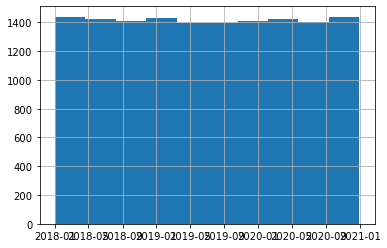

In [6]:
df_ev_all["parking_start"].dt.date.hist()

In [7]:
df_ev.shape[0] / df_ev["parking_start"].dt.date.nunique()

12.917808219178083

## Price

### Price data 

In [8]:
df_price = pd.read_csv('../price_data_saidur.csv', parse_dates = ["date"])#.set_index('date')
df_price.describe(datetime_is_numeric=True)

,date,price_da,key,minutes,price_imbalance,regulation_state,mid_price
count,26280,26280.000000,26280.000000,26280.000000,26280.000000,26280.000000,26280.000000
mean,2019-07-02 11:30:00,41.974548,4.000685,90.020548,42.006465,0.690145,31.531498
min,2018-01-01 00:00:00,-79.190000,0.000000,0.000000,-341.427500,-8.000000,0.000000
25%,2018-10-01 17:45:00,31.990000,4.000000,90.000000,21.891875,-2.000000,23.016875
50%,2019-07-02 11:30:00,40.450000,4.000000,90.000000,34.201250,1.000000,31.272500
75%,2020-04-01 05:15:00,50.892500,4.000000,90.000000,50.793125,3.000000,39.590625
max,2020-12-30 23:00:00,200.040000,14.000000,360.000000,717.250000,8.000000,107.380000
std,NaN,16.340787,0.116062,3.040807,43.512575,2.816954,11.310907


In [9]:
df_price.head()

,date,price_da,key,minutes,price_imbalance,regulation_state,mid_price
0,2018-01-01 00:00:00,27.20,4,90,13.9625,2,33.1000
1,2018-01-01 01:00:00,27.30,4,90,33.7350,1,33.2100
2,2018-01-01 02:00:00,30.10,4,90,33.6750,2,33.5025
3,2018-01-01 03:00:00,20.87,4,90,42.7675,0,33.1500
4,2018-01-01 04:00:00,25.56,4,90,34.4225,2,32.9650


### Price Sampling

In [10]:
df_sampling_price = pd.read_csv('../sampling_price_data.csv', parse_dates=['Date'])
df_sampling_price.describe(datetime_is_numeric=True)

,Date,price_da,price_imbalance,Hour
count,32880,32880.000000,32880.000000,32880.000000
mean,2019-11-16 11:59:59.999999744,0.047930,0.047552,11.500000
min,2018-01-01 00:00:00,-0.079190,-0.414170,0.000000
25%,2018-12-09 00:00:00,0.033867,0.023190,5.750000
50%,2019-11-16 12:00:00,0.043890,0.037283,11.500000
75%,2020-10-24 00:00:00,0.056570,0.059684,17.250000
max,2021-10-01 00:00:00,0.248280,0.717250,23.000000
std,NaN,0.024525,0.053456,6.922292


In [11]:
display(df_price[( pd.to_datetime("2019-10-24 03:00:00") <= df_price["date"]) & (df_price["date"] < pd.to_datetime("2019-10-24 04:00:00")) ])
display(df_sampling_price[(df_sampling_price["Date"] == pd.to_datetime("2019-10-24 00:00:00")) & (df_sampling_price["Hour"] == 3)])

,date,price_da,key,minutes,price_imbalance,regulation_state,mid_price
15867,2019-10-24 03:00:00,29.41,4,90,90.13,3,18.39


,Date,price_da,price_imbalance,Hour
15867,2019-10-24,0.02941,0.09013,3


### Price test

In [12]:
#price_test_df = pd.read_csv('../new_data/new_test_data_price.csv', index_col='Date')
price_test_df = pd.read_csv('../new_data/new_test_data_price.csv', parse_dates=['Date'])
price_test_df.describe(datetime_is_numeric=True)

,Date,price_da,price_imbalance,Hour
count,8784,8784.000000,8784.000000,8784.000000
mean,2020-07-01 11:59:59.999999744,0.032244,0.034072,11.500000
min,2020-01-01 00:00:00,-0.079190,-0.341427,0.000000
25%,2020-04-01 00:00:00,0.022908,0.014124,5.750000
50%,2020-07-01 12:00:00,0.031670,0.022699,11.500000
75%,2020-10-01 00:00:00,0.040190,0.038143,17.250000
max,2020-12-31 00:00:00,0.200040,0.717250,23.000000
std,NaN,0.015303,0.050831,6.922581


In [13]:
# Is test a subset of sampling
print("Price sampling columns",  df_sampling_price.columns)
print("Prce test columns", price_test_df.columns )

df_sampling_price_2020 = df_sampling_price[(pd.to_datetime("2020-01-01") <= df_sampling_price["Date"]) & (df_sampling_price["Date"] <= pd.to_datetime("2020-12-31"))].reset_index(drop = True)
print(price_test_df.equals(df_sampling_price_2020))
df_sampling_price_2020.describe(datetime_is_numeric = True)

Price sampling columns Index(['Date', 'price_da', 'price_imbalance', 'Hour'], dtype='object')
Prce test columns Index(['Date', 'price_da', 'price_imbalance', 'Hour'], dtype='object')
True


,Date,price_da,price_imbalance,Hour
count,8784,8784.000000,8784.000000,8784.000000
mean,2020-07-01 11:59:59.999999744,0.032244,0.034072,11.500000
min,2020-01-01 00:00:00,-0.079190,-0.341427,0.000000
25%,2020-04-01 00:00:00,0.022908,0.014124,5.750000
50%,2020-07-01 12:00:00,0.031670,0.022699,11.500000
75%,2020-10-01 00:00:00,0.040190,0.038143,17.250000
max,2020-12-31 00:00:00,0.200040,0.717250,23.000000
std,NaN,0.015303,0.050831,6.922581


In [14]:
df_sampling_price_2019 = df_sampling_price[(pd.to_datetime("2019-01-01") <= df_sampling_price["Date"]) & (df_sampling_price["Date"] <= pd.to_datetime("2019-12-31"))].reset_index(drop = True)
df_sampling_price_2019.describe(datetime_is_numeric = True)

,Date,price_da,price_imbalance,Hour
count,8760,8760.000000,8760.000000,8760.000000
mean,2019-07-02 00:00:00,0.041197,0.041140,11.500000
min,2019-01-01 00:00:00,-0.009020,-0.148163,0.000000
25%,2019-04-02 00:00:00,0.034100,0.025489,5.750000
50%,2019-07-02 00:00:00,0.039700,0.032848,11.500000
75%,2019-10-01 00:00:00,0.047392,0.045947,17.250000
max,2019-12-31 00:00:00,0.121460,0.460695,23.000000
std,NaN,0.011278,0.034948,6.922582


In [15]:
df_sampling_price[df_sampling_price["Date"] == pd.to_datetime("2019-03-31")]

,Date,price_da,price_imbalance,Hour
10896,2019-03-31,0.04010,0.016035,0
10897,2019-03-31,0.03733,0.046870,1
10898,2019-03-31,0.03444,0.022462,2
10899,2019-03-31,0.04003,0.018260,3
10900,2019-03-31,0.03738,0.031625,4
10901,2019-03-31,0.03367,0.033823,5
10902,2019-03-31,0.03200,0.033168,6
10903,2019-03-31,0.03398,0.031685,7
10904,2019-03-31,0.03307,0.024935,8
10905,2019-03-31,0.03628,0.044628,9


## Prices 2019 vs 2020

Text(0.5, 1.0, 'Imbalance')

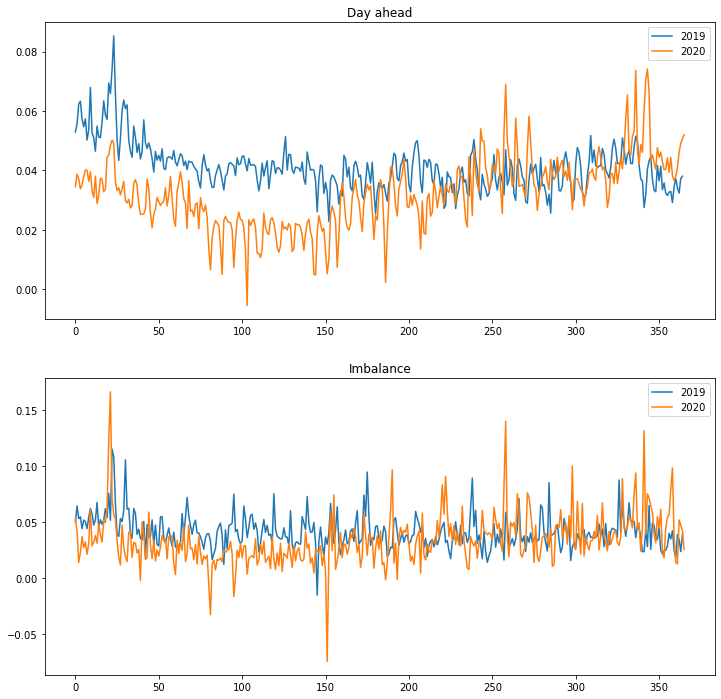

In [16]:
df_day_price_2019 = df_sampling_price_2019.groupby(by = ["Date"]).agg(price_da = ("price_da", "mean"), price_imbalance = ("price_imbalance", "mean")).reset_index()
df_day_price_2019 = df_day_price_2019.sort_values(by = ["Date"]).reset_index(drop = True)
df_day_price_2020 = df_sampling_price_2020.groupby(by = ["Date"]).agg(price_da = ("price_da", "mean"), price_imbalance = ("price_imbalance", "mean")).reset_index()
df_day_price_2020 = df_day_price_2020.sort_values(by = ["Date"]).reset_index(drop = True)

x_2019 = list(range(365))
x_2020 = list(range(366))

fig1 = plt.figure(figsize = (12,12))
ax1 = fig1.add_subplot(2,1,1)
ax2 = fig1.add_subplot(2,1,2)
y_da_2019 = df_day_price_2019["price_da"].to_numpy()
y_da_2020 = df_day_price_2020["price_da"].to_numpy()
ax1.plot(x_2019, y_da_2019, label = "2019")
ax1.plot(x_2020, y_da_2020, label = "2020")
ax1.legend()
ax1.set_title("Day ahead")

y_im_2019 = df_day_price_2019["price_imbalance"].to_numpy()
y_im_2020 = df_day_price_2020["price_imbalance"].to_numpy()
ax2.plot(x_2019, y_im_2019, label = "2019")
ax2.plot(x_2020, y_im_2020, label = "2020")
ax2.legend()
ax2.set_title("Imbalance")

In [17]:
df_day_price_2020.head(60)

,Date,price_da,price_imbalance
0,2020-01-01,0.034578,0.052888
1,2020-01-02,0.038780,0.042022
2,2020-01-03,0.037245,0.014023
3,2020-01-04,0.033758,0.022681
4,2020-01-05,0.035178,0.037029
5,2020-01-06,0.038037,0.027281
6,2020-01-07,0.040170,0.032306
7,2020-01-08,0.040068,0.021251
8,2020-01-09,0.036334,0.030833
9,2020-01-10,0.039565,0.061466


### Absolute error

In [18]:
print("DA: No fix", np.mean(np.abs(y_da_2019 - y_da_2020[:365])))
print("DA: Fix", np.mean(np.abs(y_da_2019 - np.concatenate((y_da_2020[:59], y_da_2020[60:])))))
print("")
print("IM: No fix", np.mean(np.abs((y_im_2019 - y_im_2020[:365]))))
print("IM: Fix", np.mean(np.abs(y_im_2019 - np.concatenate((y_im_2020[:59], y_im_2020[60:])))))

DA: No fix 0.013264888127853883
DA: Fix 0.013632357305936073

IM: No fix 0.01984686763426832
IM: Fix 0.020254865636551423


### Relative error


In [19]:
print("DA: No fix", np.mean( np.divide( np.abs(y_da_2019 - y_da_2020[:365]), np.abs(y_da_2019) )))
print("DA: Fix", np.mean( np.divide( np.abs(y_da_2019 - np.concatenate((y_da_2020[:59], y_da_2020[60:]))), np.abs(y_da_2019)) ))
print("")
print("IM: No fix", np.mean(np.divide(np.abs(y_im_2019 - y_im_2020[:365]), np.abs(y_im_2019))))
print("IM: Fix", np.mean(np.divide(np.abs(y_im_2019 - np.concatenate((y_im_2020[:59], y_im_2020[60:]))), np.abs(y_im_2019)) ))

DA: No fix 0.31943265083643146
DA: Fix 0.3281442928069217

IM: No fix 0.5099781787143604
IM: Fix 0.5231432953479539


## PV Gen

In [20]:
df_pv_gen_test = pd.read_csv('../new_data/new_test_data_pv.csv', parse_dates=['Date'])
df_pv_gen_test.describe(datetime_is_numeric=True)

,Date,PV_Vol,Hour
count,8784,8784.000000,8784.000000
mean,2020-07-01 11:59:59.999999744,26.001310,11.500000
min,2020-01-01 00:00:00,0.000000,0.000000
25%,2020-04-01 00:00:00,0.000000,5.750000
50%,2020-07-01 12:00:00,0.000000,11.500000
75%,2020-10-01 00:00:00,34.395250,17.250000
max,2020-12-31 00:00:00,183.510000,23.000000
std,NaN,42.649574,6.922581


In [21]:
df_sampling_pv_gen = pd.read_csv('../sampling_pv_data.csv', parse_dates=["Date"])
df_sampling_pv_gen.describe(datetime_is_numeric=True)

,Date,PV_Vol,Hour
count,26304,26304.000000,26304.000000
mean,2019-07-02 12:00:00,25.883351,11.500000
min,2018-01-01 00:00:00,0.000000,0.000000
25%,2018-10-01 18:00:00,0.000000,5.750000
50%,2019-07-02 12:00:00,0.045260,11.500000
75%,2020-04-01 06:00:00,35.831000,17.250000
max,2020-12-31 00:00:00,183.510000,23.000000
std,NaN,41.794887,6.922318
